# Normalization -> Z-Score -> 3 STD

In [1]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

from scipy.stats import boxcox
from scipy import stats

In [2]:
data = pd.read_csv('../../Capstone/Data/FirstClean_NHL_Goalie_Data.csv')
data.head()

,Player,Age,Tm,GP,GS,W,L,T/O,GA,SA,...,RBS,GSAA,G,A,PTS,PIM,Season,SV%,QS%,GA%
0,Jake Allen,29,STL,24,21,12,6,3,48,655,...,2,11.23,0,0,0,0,2019-20,0.927,0.667,81
1,Frederik Andersen,30,TOR,52,52,29,13,7,143,1577,...,8,-0.40,0,0,0,0,2019-20,0.909,0.519,100
2,Craig Anderson,38,OTT,34,31,11,17,2,100,1018,...,7,-7.95,0,1,1,0,2019-20,0.902,0.452,109
3,David Ayres,42,CAR,1,0,1,0,0,2,10,...,0,0.00,0,0,0,0,2019-20,0.800,0.000,0
4,Jonathan Bernier,31,DET,46,41,15,22,3,126,1353,...,5,-3.66,0,3,3,4,2019-20,0.907,0.415,103


In [3]:
data.dtypes

Player     object
Age         int64
Tm         object
GP          int64
GS          int64
W           int64
L           int64
T/O         int64
GA          int64
SA          int64
SV          int64
GAA       float64
SO          int64
GPS       float64
MIN         int64
QS          int64
RBS         int64
GSAA      float64
G           int64
A           int64
PTS         int64
PIM         int64
Season     object
SV%       float64
QS%       float64
GA%         int64
dtype: object

In [4]:
#Separate the numeric columns from the rest of the data
data_num=data.drop(['Player','Tm','Season'], axis=1)

In [5]:
data_num.head()

,Age,GP,GS,W,L,T/O,GA,SA,SV,GAA,...,QS,RBS,GSAA,G,A,PTS,PIM,SV%,QS%,GA%
0,29,24,21,12,6,3,48,655,607,2.15,...,14,2,11.23,0,0,0,0,0.927,0.667,81
1,30,52,52,29,13,7,143,1577,1434,2.85,...,27,8,-0.40,0,0,0,0,0.909,0.519,100
2,38,34,31,11,17,2,100,1018,918,3.25,...,14,7,-7.95,0,1,1,0,0.902,0.452,109
3,42,1,0,1,0,0,2,10,8,4.18,...,0,0,0.00,0,0,0,0,0.800,0.000,0
4,31,46,41,15,22,3,126,1353,1227,2.95,...,17,5,-3.66,0,3,3,4,0.907,0.415,103


In [6]:
data_num.columns

Index(['Age', 'GP', 'GS', 'W', 'L', 'T/O', 'GA', 'SA', 'SV', 'GAA', 'SO',
       'GPS', 'MIN', 'QS', 'RBS', 'GSAA', 'G', 'A', 'PTS', 'PIM', 'SV%', 'QS%',
       'GA%'],
      dtype='object')

In [7]:
data_objects=data.drop(['Age', 'GP', 'GS', 'W', 'L', 'T/O', 'GA', 'SA', 'SV', 'GAA', 'SO',
       'GPS', 'MIN', 'QS', 'RBS', 'GSAA', 'G', 'A', 'PTS', 'PIM', 'SV%', 'QS%',
       'GA%'], axis=1)

In [8]:
data_objects.head()

,Player,Tm,Season
0,Jake Allen,STL,2019-20
1,Frederik Andersen,TOR,2019-20
2,Craig Anderson,OTT,2019-20
3,David Ayres,CAR,2019-20
4,Jonathan Bernier,DET,2019-20


## Normalization
__Convert:__

*Positively Skewed*: square root, cube root, log, 1/x

*Negatively Skewed*: square, cubic, exponential

- Scipy Features:
   - Yeojohnson & boxcox are used to normalize the data
   - To use boxcox, all numbers in the column must be positive, if not, use stats.yeojohnson
   - Note: add [0] to output 1 column without adding the lambda column
   - After using Yeojohnson or boxcox, confirm the skewness through .skew().
       - If any values are not between -0.5 and 0.5, use the conversions above to complete the normalization

In [9]:
data_num.skew()

Age      0.558895
GP       0.456877
GS       2.310739
W        0.923496
L        0.721721
T/O      1.133800
GA       0.524253
SA       0.546587
SV       0.571793
GAA     48.755311
SO       1.961241
GPS      0.904357
MIN      0.531631
QS       2.516682
RBS      2.576220
GSAA     0.761249
G       60.796283
A        7.208867
PTS     13.298022
PIM      4.141824
SV%     -8.875796
QS%      1.485309
GA%     -0.558138
dtype: float64

In [10]:
data_num["Age.Skew"]= stats.yeojohnson(data_num["Age"])[0]
data_num["GS.Skew"]= stats.yeojohnson(data_num["GS"])[0]
data_num["W.Skew"]= stats.yeojohnson(data_num["W"])[0]
data_num["L.Skew"]= stats.yeojohnson(data_num["L"])[0]
data_num["T/O.Skew"]= stats.yeojohnson(data_num["T/O"])[0]
data_num["GA.Skew"]= stats.yeojohnson(data_num["GA"])[0]
data_num["SA.Skew"]= stats.yeojohnson(data_num["SA"])[0]
data_num["SV.Skew"]= stats.yeojohnson(data_num["SV"])[0]
data_num["GAA.Skew"]= stats.yeojohnson(data_num["GAA"])[0]
data_num["SO.Skew"]= stats.yeojohnson(data_num["SO"])[0]
data_num["GPS.Skew"]= stats.yeojohnson(data_num["GPS"])[0]
data_num["MIN.Skew"]= stats.yeojohnson(data_num["MIN"])[0]
data_num["QS.Skew"]= stats.yeojohnson(data_num["QS"])[0]
data_num["RBS.Skew"]= stats.yeojohnson(data_num["RBS"])[0]
data_num["GSAA.Skew"]= stats.yeojohnson(data_num["GSAA"])[0]
data_num["G.Skew"]= stats.yeojohnson(data_num["G"])[0]
data_num["A.Skew"]= stats.yeojohnson(data_num["A"])[0]
data_num["PTS.Skew"]= stats.yeojohnson(data_num["PTS"])[0]
data_num["PIM.Skew"]= stats.yeojohnson(data_num["PIM"])[0]
data_num["SV%.Skew"]= stats.yeojohnson(data_num["SV%"])[0]
data_num["QS%.Skew"]= stats.yeojohnson(data_num["QS%"])[0]
#data_num["GA%.Skew"]= stats.yeojohnson(data_num["GA%"])[0]

In [11]:
data_num_norm=data_num.drop(["Age",
"GS",
"W",
"L",
"T/O",
"GA",
"SA",
"SV",
"GAA",
"SO",
"GPS",
"MIN",
"QS",
"RBS",
"GSAA",
"G",
"A",
"PTS",
"PIM",
"SV%",
"QS%",
"GA%"],axis=1)

In [12]:
data_num_norm.skew()

GP            0.456877
Age.Skew      0.011817
GS.Skew       1.062113
W.Skew       -0.101310
L.Skew       -0.124077
T/O.Skew     -0.021117
GA.Skew      -0.219003
SA.Skew      -0.243742
SV.Skew      -0.241036
GAA.Skew      0.203693
SO.Skew       0.288351
GPS.Skew     -0.043841
MIN.Skew     -0.243872
QS.Skew       1.163557
RBS.Skew      1.236062
GSAA.Skew    -0.080532
G.Skew       17.527566
A.Skew        0.592248
PTS.Skew      0.589517
PIM.Skew      0.261015
SV%.Skew      0.337943
QS%.Skew      1.120916
GA%.Skew     -0.684586
dtype: float64

In [13]:
data_num_norm['GS.Skew'] = data_num_norm['GS.Skew'].apply(np.cbrt)

In [15]:
data_num_norm['QS.Skew'] = data_num_norm['QS.Skew'].apply(np.cbrt)

In [16]:
data_num_norm['RBS.Skew'] = data_num_norm['RBS.Skew'].apply(np.cbrt)

In [17]:
data_num_norm['G.Skew'] = data_num_norm['G.Skew'].apply(np.cbrt)

In [18]:
data_num_norm['A.Skew'] = data_num_norm['A.Skew'].apply(np.cbrt)

In [19]:
data_num_norm['PTS.Skew'] = data_num_norm['PTS.Skew'].apply(np.cbrt)

In [20]:
data_num_norm['QS%.Skew'] = data_num_norm['QS%.Skew'].apply(np.cbrt)

In [21]:
data_num_norm.skew()

GP            0.456877
Age.Skew      0.011817
GS.Skew       1.000943
W.Skew       -0.101310
L.Skew       -0.124077
T/O.Skew     -0.021117
GA.Skew      -0.219003
SA.Skew      -0.243742
SV.Skew      -0.241036
GAA.Skew      0.203693
SO.Skew       0.288351
GPS.Skew     -0.043841
MIN.Skew     -0.243872
QS.Skew       1.118485
RBS.Skew      1.214624
GSAA.Skew    -0.080532
G.Skew       17.527566
A.Skew        0.534267
PTS.Skew      0.530334
PIM.Skew      0.261015
SV%.Skew      0.337943
QS%.Skew      1.111785
GA%.Skew     -0.684586
dtype: float64

**_Applying the yeojohnson normalization worked for most of my data. I then tried to manually normalize the data, but some of it would not change._**

In [22]:
data_num_norm.columns

Index(['GP', 'Age.Skew', 'GS.Skew', 'W.Skew', 'L.Skew', 'T/O.Skew', 'GA.Skew',
       'SA.Skew', 'SV.Skew', 'GAA.Skew', 'SO.Skew', 'GPS.Skew', 'MIN.Skew',
       'QS.Skew', 'RBS.Skew', 'GSAA.Skew', 'G.Skew', 'A.Skew', 'PTS.Skew',
       'PIM.Skew', 'SV%.Skew', 'QS%.Skew', 'GA%.Skew'],
      dtype='object')

## Z Score

In [23]:
# create scaler
scaler = StandardScaler()

# fit and transform in one step
data_num_norm = scaler.fit_transform(data_num_norm)
data_num_zs = pd.DataFrame(data_num_norm)

In [24]:
data_num_zs.columns=['GP', 'Age', 'GS', 'W', 'L', 'T/O', 'GA',
       'SA', 'SV', 'GAA', 'SO', 'GPS', 'MIN',
       'QS', 'RBS', 'GSAA', 'G', 'A', 'PTS',
       'PIM', 'SV%', 'QS%', 'GA%']

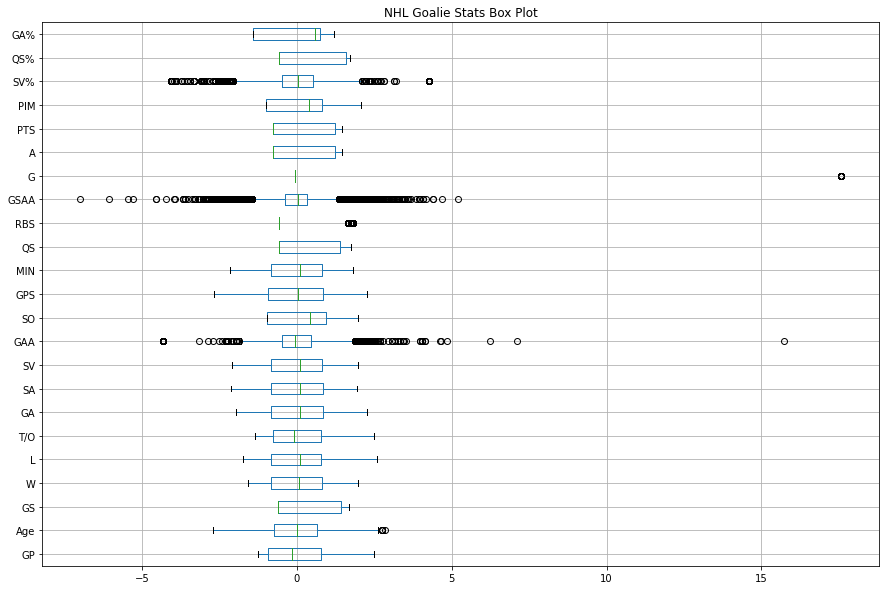

In [25]:
data_num_zs.boxplot(vert=False, figsize=(15,10))
plt.title('NHL Goalie Stats Box Plot')
plt.show()

**_The data clearly outliers. Lets see what 3 STD does_**

## 3 STD

In [26]:
for col in data_num_zs.columns:
    u_bound = data_num_zs[col].mean() + 3* data_num_zs[col].std()
    data_num_zs[col][data_num_zs[col] > u_bound] = u_bound

In [27]:
for col in data_num_zs.columns:
    l_bound = data_num_zs[col].mean() - 3*data_num_zs[col].std()
    data_num_zs[col][data_num_zs[col] < l_bound] = l_bound

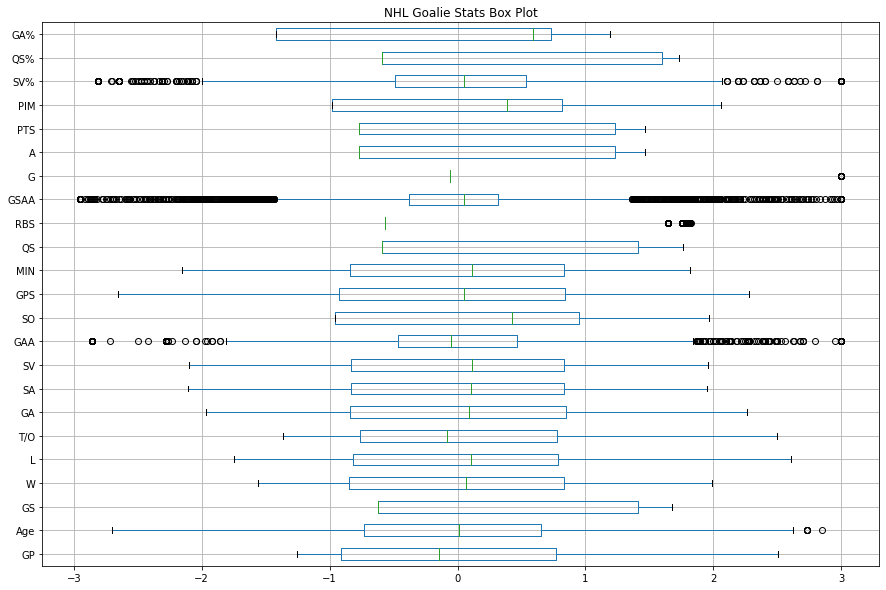

In [28]:
data_num_zs.boxplot(vert=False, figsize=(15,10))
plt.title('NHL Goalie Stats Box Plot')
plt.show()

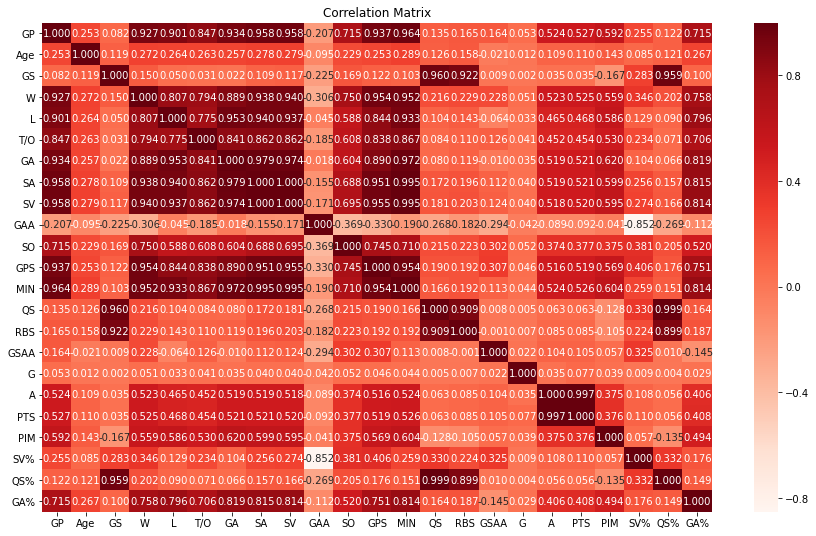

In [29]:
corr = data_num_zs.corr()
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="Reds")
plt.title("Correlation Matrix")
plt.show()

In [30]:
NHL_Gpipeline1=pd.concat([data_objects, data_num_zs], axis=1)

In [31]:
NHL_Gpipeline1.head()

,Player,Tm,Season,GP,Age,GS,W,L,T/O,GA,...,QS,RBS,GSAA,G,A,PTS,PIM,SV%,QS%,GA%
0,Jake Allen,STL,2019-20,-0.144241,0.448846,1.656912,0.427670,-0.291734,0.271968,-0.205235,...,1.743455,1.753324,0.932415,-0.056888,-0.769744,-0.771244,-0.980026,1.035140,1.723565,0.462239
1,Frederik Andersen,TOR,2019-20,1.203973,0.650220,1.675556,1.359406,0.521233,1.146744,1.084018,...,1.754784,1.816948,0.012236,-0.056888,-0.769744,-0.771244,-0.980026,0.439087,1.709183,0.680318
2,Craig Anderson,OTT,2019-20,0.337264,1.977055,1.667000,0.347135,0.868713,-0.079824,0.591681,...,1.743455,1.815210,-0.719290,-0.056888,1.232219,1.229142,-0.980026,0.225163,1.697098,0.775852
3,David Ayres,CAR,2019-20,-1.251702,2.499695,-0.620108,-1.130241,-1.748781,-1.365050,-1.722523,...,-0.587958,-0.563254,0.047771,-0.056888,-0.769744,-0.771244,-0.980026,-1.999950,-0.588572,-1.420245
4,Jonathan Bernier,DET,2019-20,0.915070,0.842286,1.672172,0.643307,1.238667,0.271968,0.900905,...,1.747819,1.808395,-0.294056,-0.056888,1.404973,1.403042,0.818993,0.376984,1.687848,0.712655


In [32]:
NHL_Gpipeline1.to_csv('../../Capstone/Data/NHL_Gpipeline1.csv', index=0)